In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Wine_clust.csv')

In [214]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [215]:
data.shape

(178, 13)

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [217]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [218]:
data.isna().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [219]:
result = {'Algorithm':[],
          'Silhouette score':[]}
result_df = pd.DataFrame(result)
result_df


,Algorithm,Silhouette score


K-Means Clustering

In [220]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.manifold import TSNE

In [221]:
wcss = []
silhouette_scores = []
for i in tqdm(range(2,14)):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(data)
  c_pred = kmeans.predict(data)
  s_score = silhouette_score(data,c_pred)
  wcss.append(kmeans.inertia_)
  silhouette_scores.append(s_score)

100%|██████████| 12/12 [00:00<00:00, 37.59it/s]


In [222]:
wcss

[4543749.614531863,
 2370689.6867829696,
 1331903.0622637176,
 916379.1871539167,
 647326.0020260852,
 412137.5091004584,
 323211.55263465457,
 270954.9292415374,
 217887.3785603329,
 187526.35378732055,
 161782.74437062978,
 139995.1199579289]

In [223]:
silhouette_scores

[np.float64(0.6568536504294317),
 np.float64(0.571138193786884),
 np.float64(0.5620323449580346),
 np.float64(0.5489993239795681),
 np.float64(0.5656413100386375),
 np.float64(0.5616196384056887),
 np.float64(0.540682474785761),
 np.float64(0.5307235924738344),
 np.float64(0.5203380520993408),
 np.float64(0.5191764165448471),
 np.float64(0.5158230791225664),
 np.float64(0.510876005010884)]

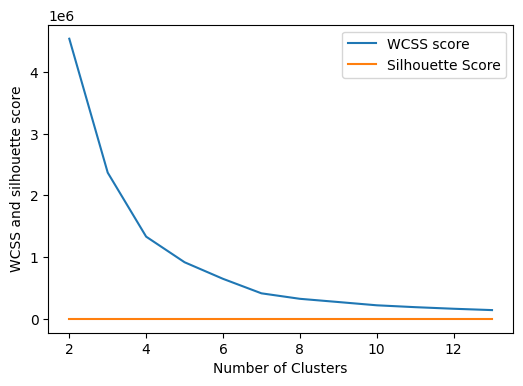

In [224]:
plt.figure(figsize = (6,4))
x = range(2,14)
plt.plot(x, wcss, label ="WCSS score")
plt.plot(x, silhouette_scores, label="Silhouette Score")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS and silhouette score')
plt.legend()
plt.show()

In [225]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                  max_iter=300, n_init=10, random_state=0)
kmeans.fit(data)
c_pred = kmeans.predict(data)
best_silhouette_score = silhouette_score(data,c_pred)
best_wcss_score = kmeans.inertia_

In [226]:
best_silhouette_score

np.float64(0.571138193786884)

In [227]:
best_wcss_score

2370689.6867829696

In [228]:
c_pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [229]:
result_df.loc[len(result_df)] = ['K-Means', best_silhouette_score]

In [230]:
result_df

,Algorithm,Silhouette score
0,K-Means,0.571138


Agglomerative Clustering

In [231]:
from sklearn.cluster import AgglomerativeClustering

In [232]:
silhouette_scores = []
for i in tqdm(range(2,14)):
  agg_hc = AgglomerativeClustering(n_clusters = i,
                             metric = 'euclidean',
                             linkage = 'ward')
  c_pred = agg_hc.fit_predict(data)
  s_score = silhouette_score(data,c_pred)
  silhouette_scores.append(s_score)

100%|██████████| 12/12 [00:00<00:00, 181.34it/s]


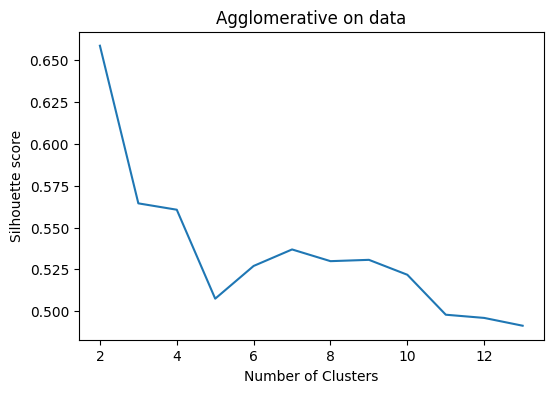

In [233]:
plt.figure(figsize = (6,4))
x = range(2,14)
plt.plot(x, silhouette_scores)
plt.title('Agglomerative on data')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')
plt.show()

In [234]:
agg_hc = AgglomerativeClustering(n_clusters = 3,
                             metric = 'euclidean',
                             linkage = 'ward')
c_pred = agg_hc.fit_predict(data)
s_score = silhouette_score(data,c_pred)

In [235]:
result_df.loc[len(result_df)] = ['Agglomerative', s_score]

In [236]:
result_df

,Algorithm,Silhouette score
0,K-Means,0.571138
1,Agglomerative,0.564480


DB Scan

In [237]:
from sklearn.cluster import DBSCAN
import numpy as np

In [238]:
db = DBSCAN(eps=0.2, min_samples=10)
db.fit(data)

DBSCAN(eps=0.2, min_samples=10)

In [239]:
db.components_

array([], shape=(0, 13), dtype=float64)

In [240]:
db.core_sample_indices_

array([], dtype=int64)

In [241]:
db.labels_    # -1 means noise.So, I am not taking this clustering method for this dataset.We can use an improved method which is hdbscan

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

hdbscan

In [242]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
clusterer.fit(data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN()

In [243]:
clusterer.labels_

array([ 1,  1, -1, -1,  3, -1,  0,  0,  1,  1, -1,  0,  0,  1, -1,  0,  0,
        1, -1,  2,  3,  3,  1,  1,  2,  2, -1,  0, -1,  1,  0, -1,  1,  0,
        1, -1,  2,  1,  1,  3,  3,  1,  1,  3,  2,  1,  1,  1,  1,  0,  1,
        0,  1, -1,  1,  1, -1,  0,  0,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3, -1,  2,  3,  3, -1,  2,  3,  3,  3,  3,  3, -1,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3, -1,  3, -1, -1,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  2,  2,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  2,  2,  3])

In [244]:
clusterer.probabilities_

array([0.51410413, 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.81523892, 0.66882296, 1.        , 1.        ,
       0.        , 1.        , 0.43089228, 0.35832309, 0.        ,
       0.61601146, 0.72675435, 0.45314823, 0.        , 1.        ,
       0.75679792, 0.98630121, 1.        , 0.604025  , 0.83002567,
       0.74707764, 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.42716258, 0.34349888, 0.51356382,
       0.        , 0.84320723, 0.52837048, 0.63820538, 0.92247111,
       0.70263349, 0.91885428, 0.53401736, 1.        , 0.72099621,
       0.74081345, 0.7779638 , 0.3958056 , 0.9505319 , 0.68418413,
       0.36240458, 0.78581277, 0.32137973, 0.        , 0.74797933,
       0.40912624, 0.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 0.        , 0.72931

In [245]:
clusterer.outlier_scores_

array([0.48589587, 0.        , 0.06111653, 0.49228557, 0.        ,
       0.45344053, 0.18476108, 0.33117704, 0.        , 0.        ,
       0.60606183, 0.        , 0.56910772, 0.64167691, 0.59968585,
       0.38398854, 0.27324565, 0.54685177, 0.76817522, 0.        ,
       0.24320208, 0.01369879, 0.        , 0.395975  , 0.16997433,
       0.25292236, 0.04726528, 0.        , 0.01561046, 0.        ,
       0.        , 0.61989778, 0.57283742, 0.65650112, 0.48643618,
       0.11179158, 0.15679277, 0.47162952, 0.36179462, 0.07752889,
       0.29736651, 0.08114572, 0.46598264, 0.        , 0.27900379,
       0.25918655, 0.2220362 , 0.6041944 , 0.0494681 , 0.31581587,
       0.63759542, 0.21418723, 0.67862027, 0.38803917, 0.25202067,
       0.59087376, 0.30800891, 0.        , 0.        , 0.28415845,
       0.        , 0.11377887, 0.        , 0.        , 0.15951429,
       0.        , 0.31866306, 0.26441972, 0.        , 0.29150184,
       0.        , 0.        , 0.31885481, 0.02411537, 0.27068

In [246]:
clusterer.cluster_persistence_

array([0.2758151 , 0.23196794, 0.14681459, 0.11748253])

Finally we can compare the same metric 'Silhouette score' in K-means and agglomerative clustering methods

In [247]:
result_df

,Algorithm,Silhouette score
0,K-Means,0.571138
1,Agglomerative,0.564480


We have to choose the algorithm with highest silhouette score.So, I am choosing K-mean clustering method.